In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(font_scale=1.5, rc={'text.usetex' : True})
sns.set_style("white")
sns.set_style("ticks")

In [3]:
def plot_inference_result(data, portion, true_parameter = False, save = False):
    print("number of samples: ", data.shape[0])
    if true_parameter:
        posterior_df = pd.DataFrame(np.exp(data[round(data.shape[0]*(1-portion)):,:]), columns=[r"$A$", r"$\beta_{i,e}$", r"$\nu_{s,e,r}$", r"$\nu_i$", r"$\gamma_e$", r"$\gamma_r$", r"$\gamma_d$", r"$\sigma$", r"$R_e$"])
    else:
        posterior_df = pd.DataFrame(data[round(data.shape[0]*(1-portion)):,:], columns=[r"$\ln(A)$", r"$\ln(\beta_{i,e})$", r"$\ln(\nu_{s,e,r})$", r"$\ln(\nu_i)$", r"$\ln(\gamma_e)$", r"$\ln(\gamma_r)$", r"$\ln(\gamma_d)$", r"$\ln(\sigma)$",r"$\ln(I_e)$"])
    g = sns.PairGrid(posterior_df)
    g = g.map_upper(sns.scatterplot)
    g = g.map_lower(sns.kdeplot, colors="C0")
    g = g.map_diag(sns.kdeplot, lw=2)

In [4]:
#data_path = './inference_result/full_t20_run/'
#data_path = './inference_result/synthetic_sd15_t5/'
#data_path = './inference_result/synthetic_sd25_t5/'

data_path = '../../Results/mcmc_multi_chain/mcmc_4/param_dim_7/validation_result/run_1/'

In [5]:
try:
    true_data = np.load(data_path + "true_solution.npz")
    noisey_solution = true_data["noisey_solution"]
    true_solution = true_data["solution"]
    true_parameter = true_data["parameter"]
    synthetic_data_used = True
except FileNotFoundError:
    noisey_solution = np.array([[ 66568.,1698.],[ 68271.,1734.],[ 69920.,1767.],[ 71613., 1788.],\
            [ 73553., 1819.],[ 74978., 1830.],[ 75616., 1836.],[ 77253., 1853.],\
             [ 79757., 1885.],[ 81583., 1920.],[ 83680., 1939.],[ 86011., 1957.],\
             [ 87854., 1976.],[ 89108., 1983.],[ 93206., 2029.],[ 96335., 2062.],\
             [ 99851., 2105.],[103305., 2140.],[107735., 2165.],[111601., 2182.]])
    synthetic_data_used = False

In [6]:
qoi_name = 'qoi'
qoi_data = np.load(data_path + qoi_name + '.npy')
print(qoi_data.shape)

(1597, 30, 2)


IndexError: index 20 is out of bounds for axis 0 with size 20

<Figure size 432x288 with 0 Axes>

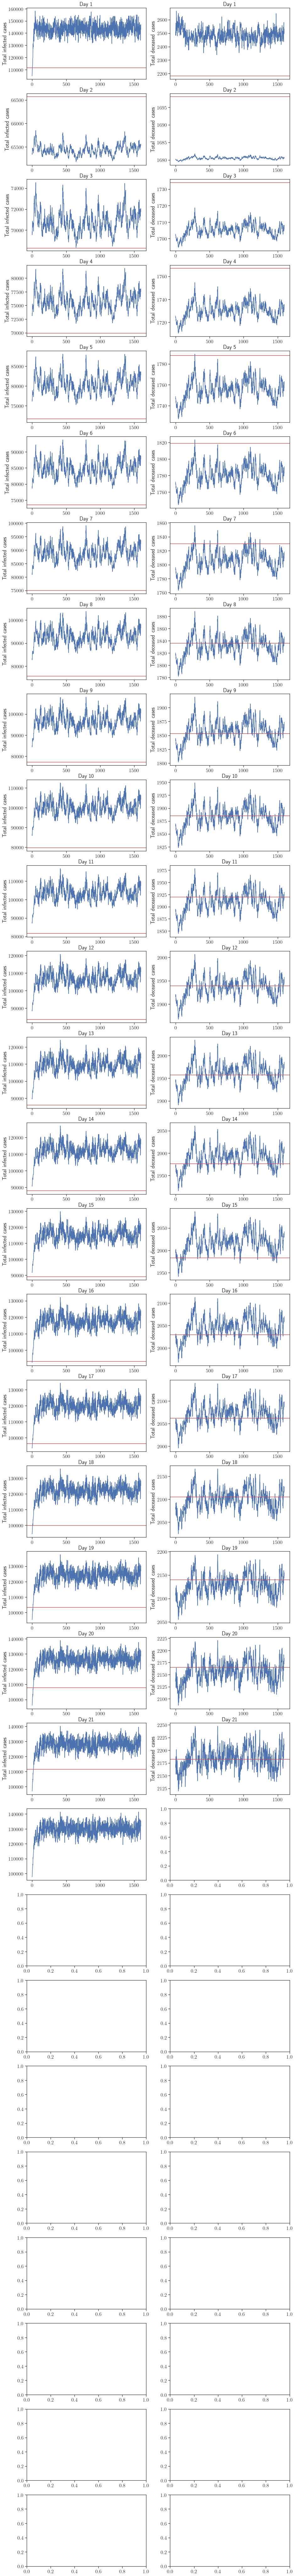

In [7]:
plt.figure(1)
fig, axs = plt.subplots(nrows=qoi_data.shape[1], ncols=2, figsize=(15,qoi_data.shape[1]*5))
for row in range(qoi_data.shape[1]):
    axs[row, 0].plot(np.arange(qoi_data.shape[0]), qoi_data[:,row-1,0])
    axs[row, 0].axhline(y=noisey_solution[row-1, 0], color='r', linestyle='-')
    if synthetic_data_used:
        axs[row, 0].axhline(y=true_solution[row-1, 0], color='b', linestyle='--')
    axs[row, 0].set_title(r"Day " + str(row+1))
    axs[row, 0].set_ylabel(r'Total infected cases')
    axs[row, 1].plot(np.arange(qoi_data.shape[0]), qoi_data[:,row-1,1])
    axs[row, 1].axhline(y=noisey_solution[row-1, 1], color='r', linestyle='-')
    if synthetic_data_used:
        axs[row, 1].axhline(y=true_solution[row-1, 1], color='g', linestyle='--')
    axs[row, 1].set_title(r"Day " + str(row+1))
    axs[row, 1].set_ylabel(r'Total deceased cases')
plt.show()

Integrated autocorrelation time 10.639490792418114


(0.0, 1.0)

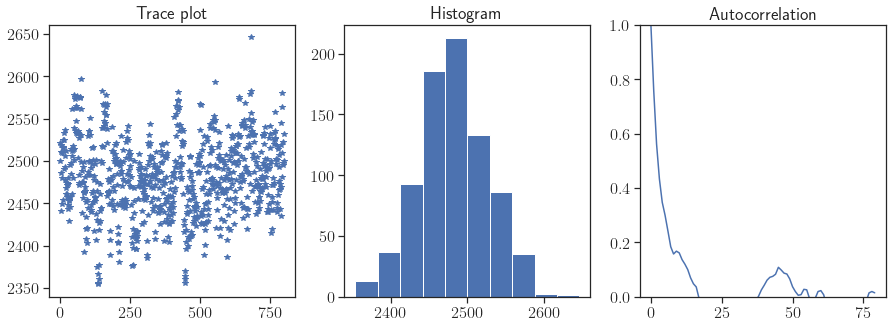

In [8]:
import hippylib as hl
day = 30
q = qoi_data[round(qoi_data.shape[0]/2.):, day-1, 1]
# q = qoi_data[:, day-1, 0]
integrated_corr_time, lags, acorrs = hl.integratedAutocorrelationTime(q)
print ("Integrated autocorrelation time", integrated_corr_time)

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(q, '*b')
plt.title(r'Trace plot')

plt.subplot(132)
plt.hist(q)
plt.title(r'Histogram')

plt.subplot(133)
plt.plot(lags, acorrs, '-b') 
plt.title(r'Autocorrelation')
plt.ylim([0., 1.])
    

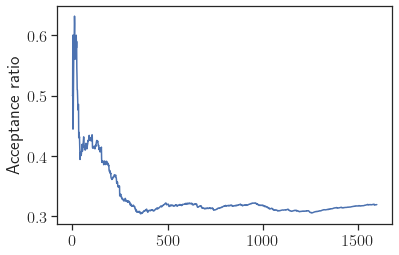

[0.5        0.5        0.6        ... 0.31938326 0.31951952 0.31952781]


In [9]:
ar_name = 'acceptance_rate'
ar_data = np.load(data_path + ar_name + '.npy')
plt.plot(np.arange(ar_data.size), ar_data)
plt.ylabel('Acceptance ratio')
plt.show()
print(ar_data)

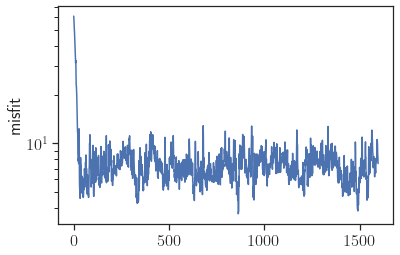

In [10]:
cost_name = 'cost'
cost_data = np.load(data_path + cost_name + '.npy')
plt.semilogy(np.arange(cost_data.size), cost_data)
plt.ylabel('misfit')
plt.show()


In [11]:
param_name = 'param_samples'
param_data = np.load(data_path + param_name + '.npy')

#param_data = param_data[round(param_data.shape[0]/2.):, :]
param_data = param_data[150:, :]
print(param_data.shape)

(1447, 7)


IndexError: index 7 is out of bounds for axis 1 with size 7

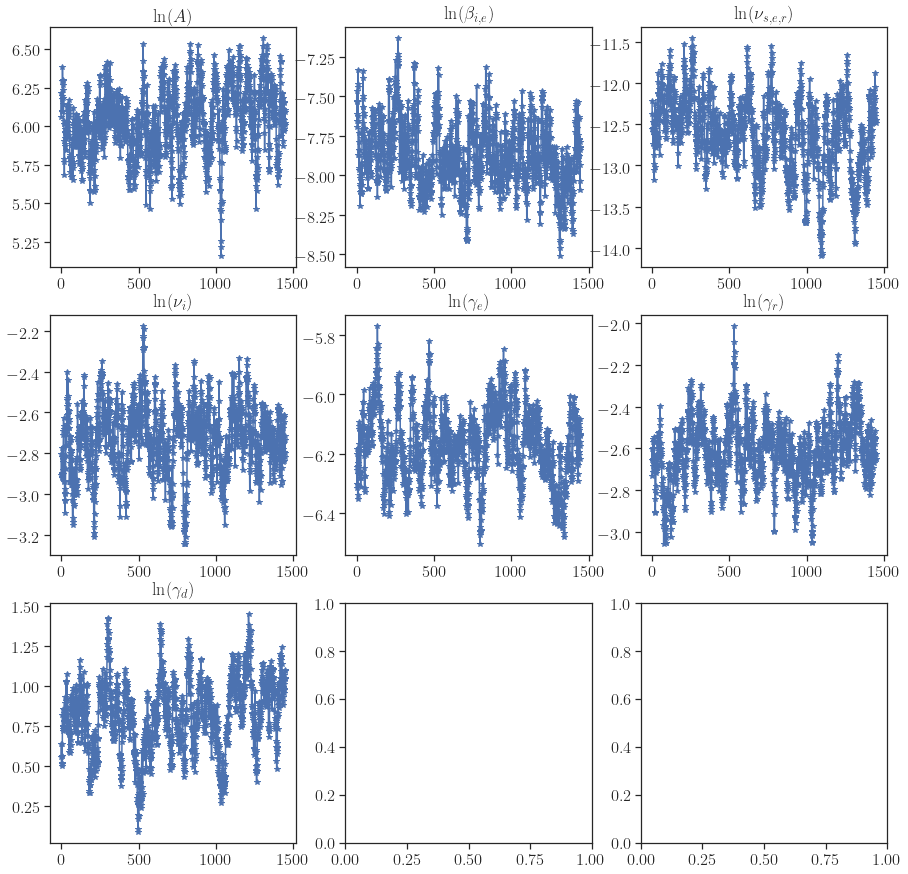

In [12]:
#titles = [r"$\ln(A)$", r"$\ln(\beta_{i,e})$", r"$\ln(\nu_{s,e,r})$", r"$\ln(\gamma_r)$", r"$\ln(\gamma_d)$", r"$\ln(\sigma)$",r"$\ln(I_e)$"]
titles = [r"$\ln(A)$", r"$\ln(\beta_{i,e})$", r"$\ln(\nu_{s,e,r})$", r"$\ln(\nu_i)$", r"$\ln(\gamma_e)$", r"$\ln(\gamma_r)$", r"$\ln(\gamma_d)$", r"$\ln(\sigma)$",r"$\ln(I_e)$"]
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
idx = 0
for col in range (3):
    for row in range (3):
        axs[col, row].plot(np.arange(param_data.shape[0]), param_data[:, idx], '*-')
        axs[col, row].set_title(titles[idx])
        if synthetic_data_used:
            axs[col, row].axhline(y = true_parameter[idx], color = 'r')
        idx +=1

In [ ]:
import hippylib as hl

fig, axs = plt.subplots(nrows=param_data.shape[1], ncols=3, figsize=(15,param_data.shape[1]*5))
for row in range(param_data.shape[1]):
    integrated_corr_time, lags, acorrs = hl.integratedAutocorrelationTime(param_data[:, row])
    print ("Integrated autocorrelation time", integrated_corr_time)
    axs[row, 0].plot(param_data[:, row], '*-b')
    if synthetic_data_used:
        axs[row, 0].axhline(y=true_parameter[row], color = 'r')
    
    axs[row, 0].set_ylabel(titles[row])
    axs[row, 1].hist(param_data[:, row])
    if synthetic_data_used:
        axs[row, 1].axvline(x=true_parameter[row], color = 'r')
    axs[row, 1].set_xlabel(titles[row])
    axs[row, 2].plot(lags, acorrs, '-b')
    axs[row, 2].set_ylim([0., 1.])
    
axs[0, 0].set_title(r'Trace plot')
axs[0, 1].set_title(r'Histogram')
axs[0, 2].set_title(r'Autocorrelation')
plt.show()

In [ ]:
#plot_inference_result(param_data, 1., true_parameter = False)

In [ ]:
mean = np.exp(np.mean(param_data, axis = 0))

In [ ]:
print(mean)

In [13]:
# mean_mcmc4_run4 = mean
# print(mean_mcmc4_run4)

In [14]:
print(mean_mcmc9_run1)
print(mean_mcmc9_run2)
print(mean_mcmc9_run3)
print(mean_mcmc9_run4)

NameError: name 'mean_mcmc9_run1' is not defined

In [15]:
print(mean_mcmc4_run1)
print(mean_mcmc4_run2)
print(mean_mcmc4_run3)
print(mean_mcmc4_run4)

NameError: name 'mean_mcmc4_run1' is not defined

In [24]:
run_names = [None]*5
for i in range(4):
    run_names[i] = "run_" +str(i+1) + "/"
for i in range(4):
    data_path = '../../Results/mcmc_multi_chain/mcmc_4/param_dim_7/validation_result/' + run_names[i]
    param_name = 'param_samples'
    param_data = np.load(data_path + param_name + '.npy')
    
    qoi_data = np.load(data_path + 'qoi.npy')
    if i == 0:
#         total_param_data = param_data[round(param_data.shape[0]/2.):, :].copy()
        total_param_data = param_data[300:, :].copy()
        total_qoi_data = qoi_data[300:, :].copy()
    else:
#         total_param_data = np.append(total_param_data, param_data[round(param_data.shape[0]/2.):, :], axis = 0)
        total_param_data = np.append(total_param_data, param_data[300:, :], axis = 0)
        total_qoi_data = np.append(total_qoi_data, qoi_data[300:, :], axis = 0)
#     mean = np.exp(np.mean(param_data, axis = 0))
#     print(mean)

In [25]:
total_param_data.shape, total_qoi_data.shape

((4530, 7), (4530, 30, 2))

In [18]:
plot_inference_result(total_param_data, 1., true_parameter = False)

number of samples:  4530


ValueError: Shape of passed values is (4530, 7), indices imply (4530, 9)

In [19]:
mean_more = np.exp(np.mean(total_param_data, axis = 0))

In [21]:
print(mean_more)

[4.01614734e+02 3.67188203e-04 3.47195022e-06 6.43351342e-02
 2.12130271e-03 7.11583267e-02 2.21492792e+00]


In [22]:
print(mean_new)
print(mean_more)

NameError: name 'mean_new' is not defined

In [23]:
print(np.log(mean_1))
print(np.log(mean_2))
print(np.log(mean_3))

NameError: name 'mean_1' is not defined

In [66]:
total_param_data.shape

(3212, 9)

In [57]:
posterior = np.delete(total_param_data, [3,4], axis = 1)

In [58]:
posterior.shape

(3212, 7)

In [67]:
print(np.exp(np.mean(posterior, axis = 0)))

[6.67362233e+02 2.89403550e-04 5.62201199e-06 7.81474081e-02
 2.20909083e-03 8.49626528e-02 2.74445675e+00]


In [61]:
np.save('calibration_posterior_samples.npy', posterior)